# R Analysis

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
from scipy import polyfit, polyval
from scipy.stats import norm
from scipy.interpolate import make_interp_spline, BSpline

%matplotlib inline

## objectives
1. year vice graph NDVI values
2. yala, maha season vice graph in one yr
3. remove the cloud affect & regraph

In [2]:
ndvi_df = pd.read_csv('./csv/ndvi.csv')
ndvi_df.head(5)

,Unnamed: 0,channel,date,min,max,mean,stDev
0,177,0,2015-11-28,0.024384,0.242231,0.088855,0.051101
1,176,0,2015-12-28,-0.012204,0.110473,0.036047,0.022595
2,175,0,2016-03-27,0.065089,0.313997,0.182319,0.043077
3,174,0,2016-04-26,0.072630,0.266636,0.181640,0.039938
4,173,0,2016-06-05,0.025319,0.680269,0.191573,0.141791


### adding col

In [3]:
ndvi_df['Ticks'] = range(0,len(ndvi_df.index.values))
ndvi_df.head(5)

,Unnamed: 0,channel,date,min,max,mean,stDev,Ticks
0,177,0,2015-11-28,0.024384,0.242231,0.088855,0.051101,0
1,176,0,2015-12-28,-0.012204,0.110473,0.036047,0.022595,1
2,175,0,2016-03-27,0.065089,0.313997,0.182319,0.043077,2
3,174,0,2016-04-26,0.072630,0.266636,0.181640,0.039938,3
4,173,0,2016-06-05,0.025319,0.680269,0.191573,0.141791,4


In [106]:
ndvi_df['Rolling_mean'] = ndvi_df['mean'].rolling(window = 10).mean()
ndvi_df.head(5)

,Unnamed: 0,channel,date,min,max,mean,stDev,Ticks,Rolling_mean
0,177,0,2015-11-28,0.024384,0.242231,0.088855,0.051101,0,NaN
1,176,0,2015-12-28,-0.012204,0.110473,0.036047,0.022595,1,NaN
2,175,0,2016-03-27,0.065089,0.313997,0.182319,0.043077,2,NaN
3,174,0,2016-04-26,0.072630,0.266636,0.181640,0.039938,3,NaN
4,173,0,2016-06-05,0.025319,0.680269,0.191573,0.141791,4,NaN


### yr vice mean NDVI value graph with cloud

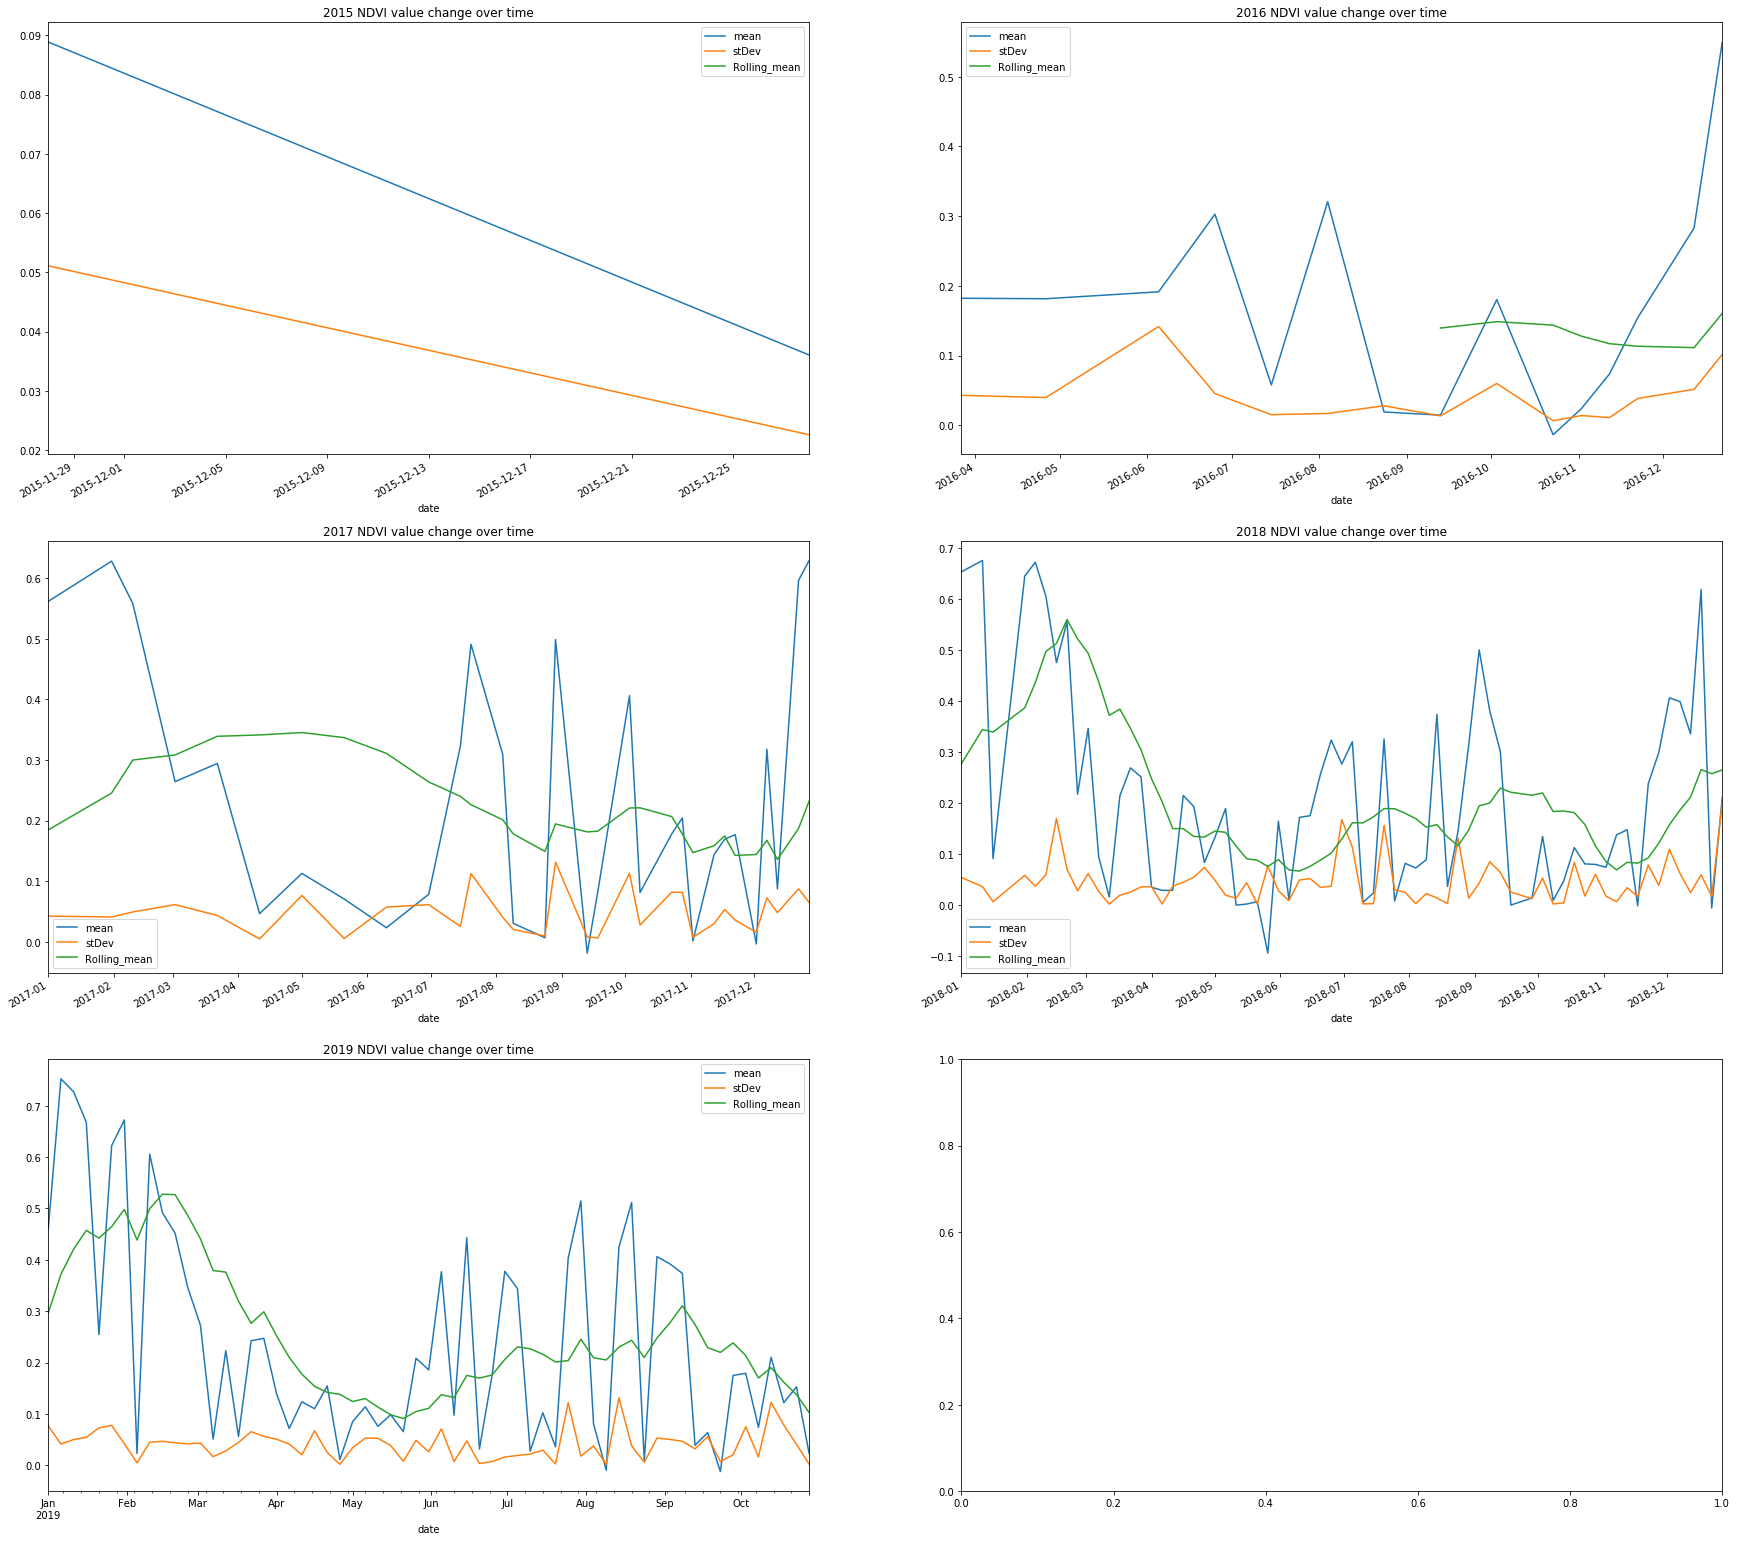

In [113]:
years = [2015, 2016, 2017, 2018,2019]
fig, axes = plt.subplots(nrows=3,ncols=2,figsize=(30,30))
row = col =0
ndvi_df['date'] = pd.to_datetime(ndvi_df['date'])

for i, year in enumerate(years):
    new_df = ndvi_df[ndvi_df['date'].dt.year == year]
   
    if i % 2==0:
        col = 0
        row = row +1
    else:
        col = 1
    
    #save data & and plot
    new_df.to_csv('./csv/'+str(year)+'ndvi.csv', sep=',')
#     axes[row-1,col].plot(new_df['date'],new_df['mean'])
    new_df.plot(x='date',y=['mean', 'stDev', 'Rolling_mean'], ax=axes[row-1,col])
    axes[row-1,col].set_title(str(year) + ' NDVI value change over time')
    

    

### yr vice with yala maha season NDVI values change over the time with cloud

In [266]:
def ndvi_yala_maha(yala_Maha_dates, yala_maha_tag):
    df = pd.read_csv('./csv/ndvi.csv') # main cvs file
    df['Rolling_mean'] = df['mean'].rolling(window = 20).mean() # smoothing data
    
    fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(30,7))
    
    for i in range(0,2):

        # check the date between start_date and end_date and plot them
        new_df = df[(df['date'] >= yala_Maha_dates[i][0]) &  (df['date'] <= yala_Maha_dates[i][1])]

    #     axes[tag[2]].plot(new_df['date'],new_df['mean'])
    #     axes[tag[2]].set_title(tag[0]+' '+tag[1]+' season NDVI change over time',fontsize=20) 
        ax = new_df.plot(x='date',y=['mean', 'stDev', 'Rolling_mean'], ax=axes[i])
        ax.set_title(yala_maha_tag[i][0]+' '+yala_maha_tag[i][1]+' season NDVI change over time',fontsize=20) 

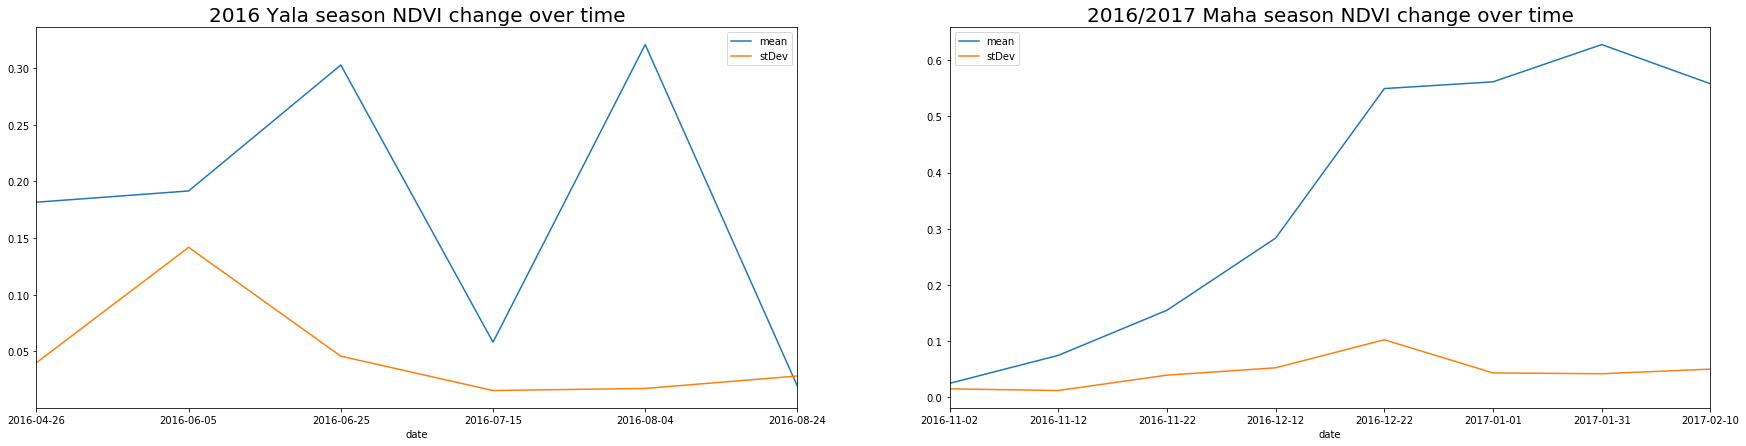

In [5]:
# ndvi_yala_maha(csv_file, start_date, end_date,tag=('yala/maha'))
ndvi_yala_maha([['2016-04-25', '2016-08-30'], ['2016-10-26', '2017-02-25']],[['2016', 'Yala'],['2016/2017', 'Maha']])


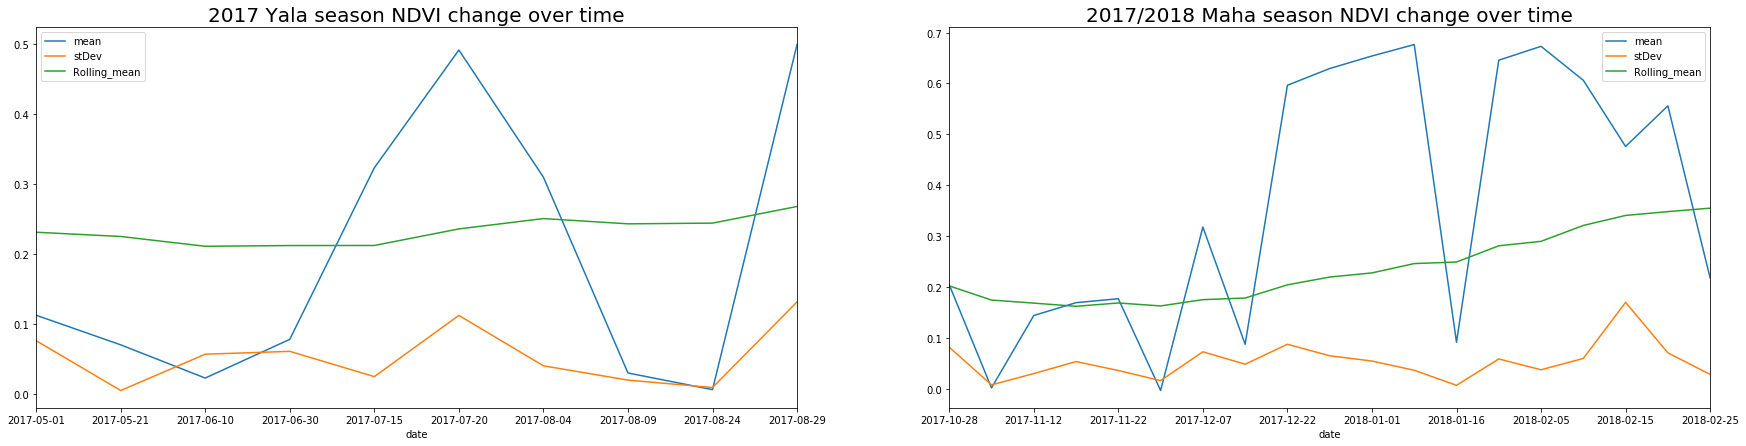

In [267]:
ndvi_yala_maha([['2017-04-25', '2017-08-30'], ['2017-10-26', '2018-02-25']],[['2017', 'Yala'],['2017/2018', 'Maha']])

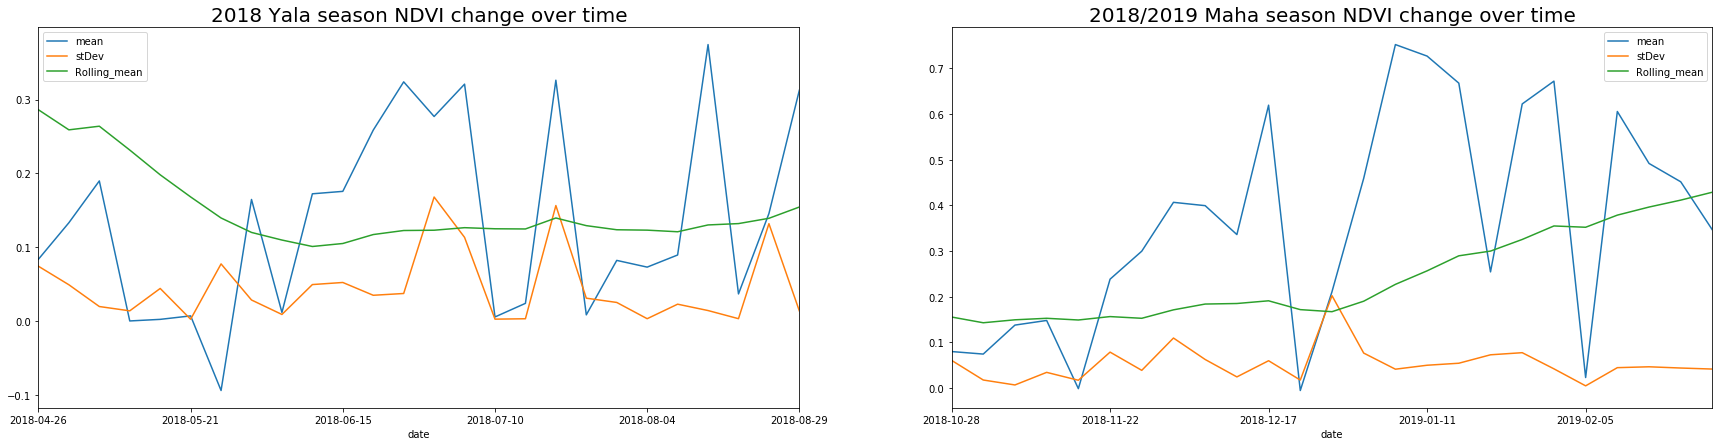

In [268]:
ndvi_yala_maha([['2018-04-25', '2018-08-30'], ['2018-10-26', '2019-02-25']],[['2018', 'Yala'],['2018/2019', 'Maha']])

d:\campuz\4 yr\research-final\env\lib\site-packages\pandas\plotting\_matplotlib\core.py:1085: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


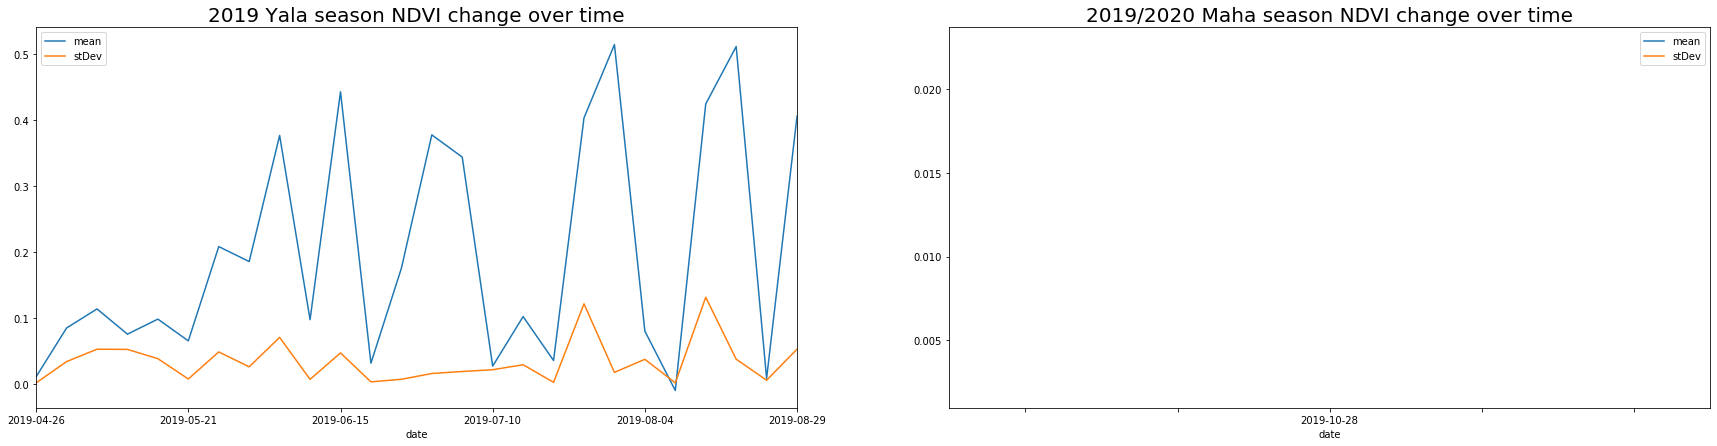

In [13]:
ndvi_yala_maha([['2019-04-25', '2019-08-30'], ['2019-10-26', '2020-02-25']],[['2019', 'Yala'],['2019/2020', 'Maha']])

### yr vice with yala maha season NDVI values change over the time without cloud and best fit line

In [9]:
def get_cloud_free_dates(root = './b11b8b2-dataset'):
    
    could_free_arr=[]
    
    for _root, _dirs, _files in os.walk(root):
        if _files:
            could_free_arr += _files
            
    # get only date array
    
    for i, elem in enumerate(could_free_arr):
        could_free_arr[i] = elem.split('_')[-2].split('T')[0]
    
    return (could_free_arr)

In [353]:
def ndvi_yala_maha_with_out_cloud(yala_Maha_dates, yala_maha_tag):
    
    df = pd.read_csv('./csv/ndvi.csv') # main cvs file
    
    df['Rolling_mean'] = df['mean'].rolling(window = 20).mean() # smoothing data
    df['numaric_dates'] = pd.to_datetime(df['date']).map(dt.datetime.toordinal)
    
    cloud_free_dates = get_cloud_free_dates()
    rows = []
    col = ['date', 'mean', 'stDev', 'Rolling_mean']
    
    fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(30,7))
    
    # create a df  cloud
    for date in cloud_free_dates:
#         print(date) sub_df.iloc[0]['A']
        cloud_free_df = df[(df.date == date)]
        row = [cloud_free_df.iloc[0]['date'], cloud_free_df.iloc[0]['mean'], 
               cloud_free_df.iloc[0]['stDev'], cloud_free_df.iloc[0]['Rolling_mean']]
        rows.append(row)
        
    cloud_free_df = pd.DataFrame(rows, columns=col) # this is a cloud free dataset
    
    
    for i in range(0,2):
        arr_ndvi = []
        # check the date between start_date and end_date and plot them
        new_df = cloud_free_df[(cloud_free_df['date'] >= yala_Maha_dates[i][0]) &  (cloud_free_df['date'] <= yala_Maha_dates[i][1])]
        # save data
        new_df.to_csv('./csv/update_yield/'+yala_maha_tag[i][0]+'_'+yala_maha_tag[i][1]+'_ndvi.csv', sep=',')
        
        if len(new_df.index) <= 1:
            continue # to remove the error of 0 data points
            
    #     axes[tag[2]].plot(new_df['date'],new_df['mean'])
    #     axes[tag[2]].set_title(tag[0]+' '+tag[1]+' season NDVI change over time',fontsize=20) 
    
        ax = new_df.plot(x='date',y=['mean', 'stDev', 'Rolling_mean'], ax=axes[i],linewidth=3)
        ax.set_title(yala_maha_tag[i][0]+' '+yala_maha_tag[i][1]+' season NDVI change over time',fontsize=20)
        
        
        
        numaric_dates = [date for date in pd.to_datetime(new_df['date']).map(dt.datetime.toordinal)]
        mean_val = [mean for mean in new_df['mean']]
        
        # data need for plotting norm
        x_max = np.array(numaric_dates).max()
        x_min = np.array(numaric_dates).min()
        x_norm = np.linspace(x_min, x_max, 100)
        mu, std = norm.fit(mean_val)
        p = norm.pdf(x_norm, mu, std)
        
        p1 = polyfit(numaric_dates, mean_val, 1)
        p2 = polyfit(numaric_dates, mean_val, 2)
        p3 = polyfit(numaric_dates, mean_val, 3)
        print('liner gradient is: ' + str(p1[0]))
        print('poly gradient is 2: ' + str(p2[0])+' '+str(p2[1])+' '+str(p3[2]))
        print('poly gradient is 3: ' + str(p3[0])+' '+str(p3[1])+' '+str(p3[2])+' '+str(p3[3]))
        print('poly gradient is 3[0]: ' + str(p3[0]))
        print('poly gradient is 3[1]: ' + str(p3[1]))
        print('poly gradient is 3[2]: ' + str(p3[2]))
        print('poly gradient is 3[3]: ' + str(p3[3]))
        
        #smooth stuff here
        num_dates_linspace = np.linspace(numaric_dates[0], numaric_dates[-1], 10)
        # get the NDVI array for analysis
        for num_date in num_dates_linspace:
            arr_ndvi.append(polyval(p3,num_date))
        np_arr_ndvi = np.array(arr_ndvi)
        if i == 0:
            if os.path.exists("./csv/temp/yala_file.csv"):
                os.remove("./csv/temp/yala_file.csv")
            pd.DataFrame(np_arr_ndvi).to_csv("./csv/temp/yala_file.csv", header=['mean'])
        else:
            if os.path.exists("./csv/temp/Maha_file.csv"):
                os.remove("./csv/temp/Maha_file.csv")
            pd.DataFrame(np_arr_ndvi).to_csv("./csv/temp/Maha_file.csv", header=['mean'])
        
        ax.plot(x_norm, p)
#         ax.hist(mean_val, bins=1, density=False, alpha=0.6, color='k')
        ax.plot([date for date in new_df['date']], polyval(p1,numaric_dates),'g--', label='liner')
        ax.plot([date for date in new_df['date']], polyval(p2,numaric_dates),'r--', label='ploynormial')
        ax.plot([date for date in new_df['date']], polyval(p3,numaric_dates),'k--', label='ploynormial')
        
        
        

In [328]:
def get_core_info_NDVI_original(path):
    df = pd.read_csv(path)
    
    return {'avg':df['mean'].mean(), 'max':df['mean'].max(), 'cumsum':df['mean'].cumsum()}
    

In [368]:
def get_core_info_NDVI_smooth(yala_path, maha_path, flag=[0,0]):

    if flag[0]==0:
        df_yala = pd.read_csv(yala_path)
    
    if flag[1]==0:
        df_maha = pd.read_csv(maha_path)
    
    if flag == [0,0]:
        return {'yala':{'avg':df_yala['mean'].mean(), 'max':df_yala['mean'].max(), 'cumsum':df_yala['mean'].cumsum()},
            'maha':{'avg':df_maha['mean'].mean(), 'max':df_maha['mean'].max(), 'cumsum':df_maha['mean'].cumsum()}}
    elif flag == [1,0]:
        return {'maha':{'avg':df_maha['mean'].mean(), 'max':df_maha['mean'].max(), 'cumsum':df_maha['mean'].cumsum()}}
    elif flag == [0,1]:
        return {'maha':{'avg':df_yala['mean'].mean(), 'max':df_yala['mean'].max(), 'cumsum':df_yala['mean'].cumsum()}}

d:\campuz\4 yr\research-final\env\lib\site-packages\ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.
d:\campuz\4 yr\research-final\env\lib\site-packages\ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


liner gradient is: 0.0020197529184050214
poly gradient is 2: 1.371822781792245e-09 1.2798259013862553e-07 -0.0002018326893809747
poly gradient is 3: 1.1180958135548732e-15 2.7444155799475606e-10 -0.0002018326893809747 -445.86661384841784
poly gradient is 3[0]: 1.1180958135548732e-15
poly gradient is 3[1]: 2.7444155799475606e-10
poly gradient is 3[2]: -0.0002018326893809747
poly gradient is 3[3]: -445.86661384841784
liner gradient is: 0.005184180987248778
poly gradient is 2: -0.00012652925904622496 186.34025792257816 -4342991.334645932
poly gradient is 3: -2.6702004107890327e-06 5.8983024534501665 -4342991.334645932 1065932321501.0679
poly gradient is 3[0]: -2.6702004107890327e-06
poly gradient is 3[1]: 5.8983024534501665
poly gradient is 3[2]: -4342991.334645932
poly gradient is 3[3]: 1065932321501.0679


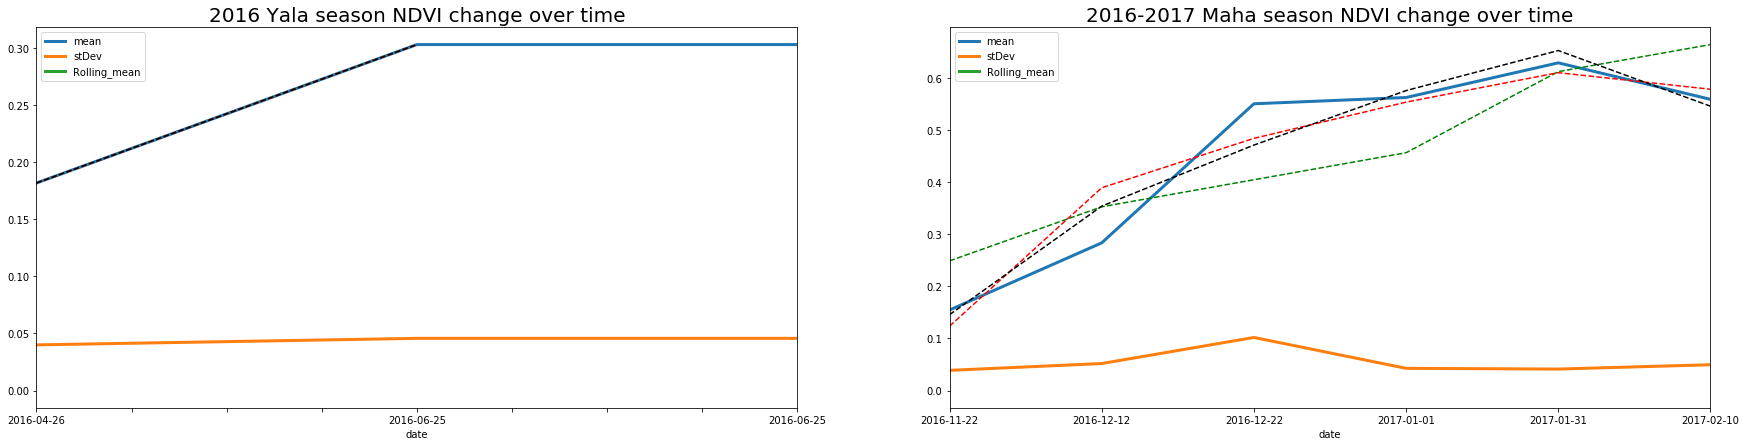

In [369]:
ndvi_yala_maha_with_out_cloud([['2016-04-25', '2016-08-30'], ['2016-10-26', '2017-02-25']],[['2016', 'Yala'],['2016-2017', 'Maha']])

In [329]:
get_core_info_NDVI_original('./csv/update_yield/2016_Yala_ndvi.csv')

{'avg': 0.2624305374516072, 'max': 0.3028255958196728, 'cumsum': 0    0.181640
 1    0.484466
 2    0.787292
 Name: mean, dtype: float64}

In [330]:
get_core_info_NDVI_original('./csv/update_yield/2016-2017_Maha_ndvi.csv')

{'avg': 0.4559369168078254, 'max': 0.6282693797303721, 'cumsum': 0    0.154349
 1    0.437450
 2    0.987227
 3    1.549030
 4    2.177299
 5    2.735622
 Name: mean, dtype: float64}

In [370]:
get_core_info_NDVI_smooth("./csv/temp/yala_file.csv", "./csv/temp/Maha_file.csv")

{'yala': {'avg': 0.2422315450322287,
  'max': 0.30282559581957,
  'cumsum': 0    0.181640
  1    0.376745
  2    0.585314
  3    0.807347
  4    1.042845
  5    1.291808
  6    1.554236
  7    1.830130
  8    2.119490
  9    2.422315
  Name: mean, dtype: float64},
 'maha': {'avg': 0.48145751953125,
  'max': 0.68115234375,
  'cumsum': 0    0.145386
  1    0.373535
  2    0.700684
  3    1.132812
  4    1.664062
  5    2.277222
  6    2.944092
  7    3.625244
  8    4.269409
  9    4.814575
  Name: mean, dtype: float64}}

liner gradient is: 0.004380542938768891
poly gradient is 2: -7.684015683258979e-05 113.2191904145867 -3806103.7574103363
poly gradient is 3: -2.3377870780411283e-06 5.166583070317524 -3806103.7574103363 934623236357.7394
poly gradient is 3[0]: -2.3377870780411283e-06
poly gradient is 3[1]: 5.166583070317524
poly gradient is 3[2]: -3806103.7574103363
poly gradient is 3[3]: 934623236357.7394


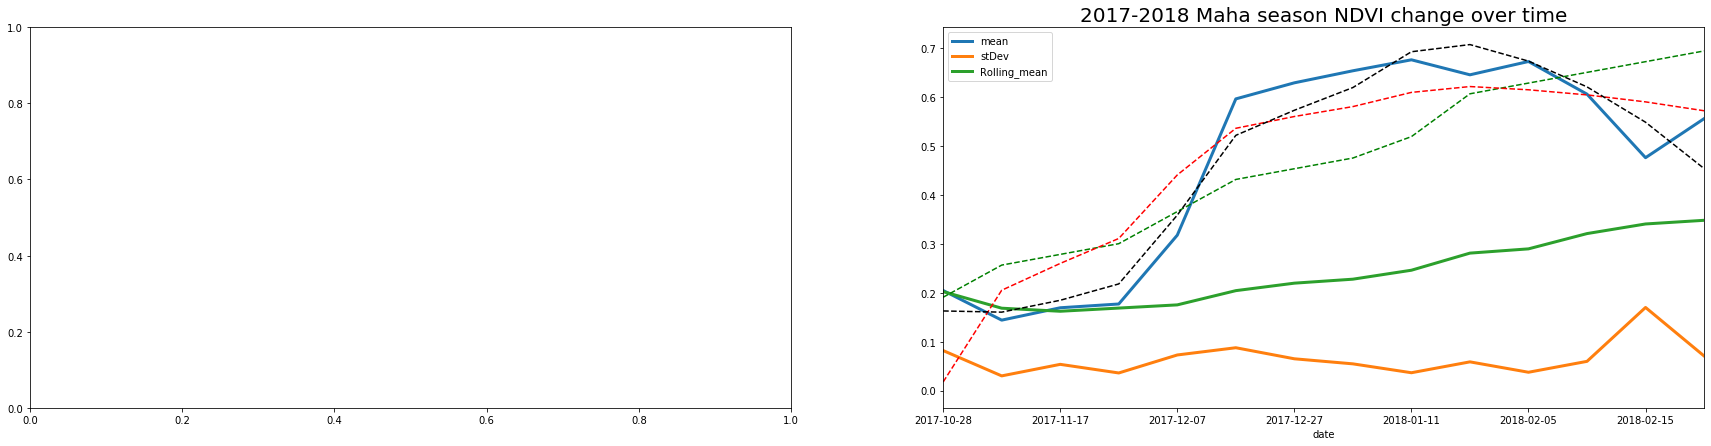

In [371]:
f = ndvi_yala_maha_with_out_cloud([['2017-04-25', '2017-08-30'], ['2017-10-26', '2018-02-25']],[['2017', 'Yala'],['2017-2018', 'Maha']])

In [332]:
get_core_info_NDVI_original('./csv/update_yield/2017_Yala_ndvi.csv')

{'avg': 0.3231697134962374, 'max': 0.3231697134962374, 'cumsum': 0    0.32317
 Name: mean, dtype: float64}

In [375]:
get_core_info_NDVI_original('./csv/update_yield/2017-2018_Maha_ndvi.csv')

{'avg': 0.46616701456952264,
 'max': 0.6764842736628629,
 'cumsum': 0     0.204527
 1     0.348475
 2     0.517728
 3     0.694704
 4     1.012498
 5     1.609019
 6     2.238431
 7     2.892472
 8     3.568956
 9     4.214748
 10    4.887770
 11    5.494012
 12    5.970256
 13    6.526338
 Name: mean, dtype: float64}

In [372]:
get_core_info_NDVI_smooth("./csv/temp/yala_file.csv", "./csv/temp/Maha_file.csv",[1,0])

{'maha': {'avg': 0.45037841796875,
  'max': 0.7257080078125,
  'cumsum': 0    0.162720
  1    0.315918
  2    0.538208
  3    0.879395
  4    1.359619
  5    1.969849
  6    2.671265
  7    3.396973
  8    4.049683
  9    4.503784
  Name: mean, dtype: float64}}

liner gradient is: 0.0016317190805207394
poly gradient is 2: -2.2689833325461207e-05 33.440861259352815 -972265.2729953761
poly gradient is 3: -5.968876631118746e-07 1.3194693809818994 -972265.2729953761 238808056935.75073
poly gradient is 3[0]: -5.968876631118746e-07
poly gradient is 3[1]: 1.3194693809818994
poly gradient is 3[2]: -972265.2729953761
poly gradient is 3[3]: 238808056935.75073
liner gradient is: 0.003891931054140413
poly gradient is 2: -0.00011711404440400721 172.64288362657035 -2111741.144763106
poly gradient is 3: -1.295856173184715e-06 2.8652292121061893 -2111741.144763106 518800918356.9003
poly gradient is 3[0]: -1.295856173184715e-06
poly gradient is 3[1]: 2.8652292121061893
poly gradient is 3[2]: -2111741.144763106
poly gradient is 3[3]: 518800918356.9003


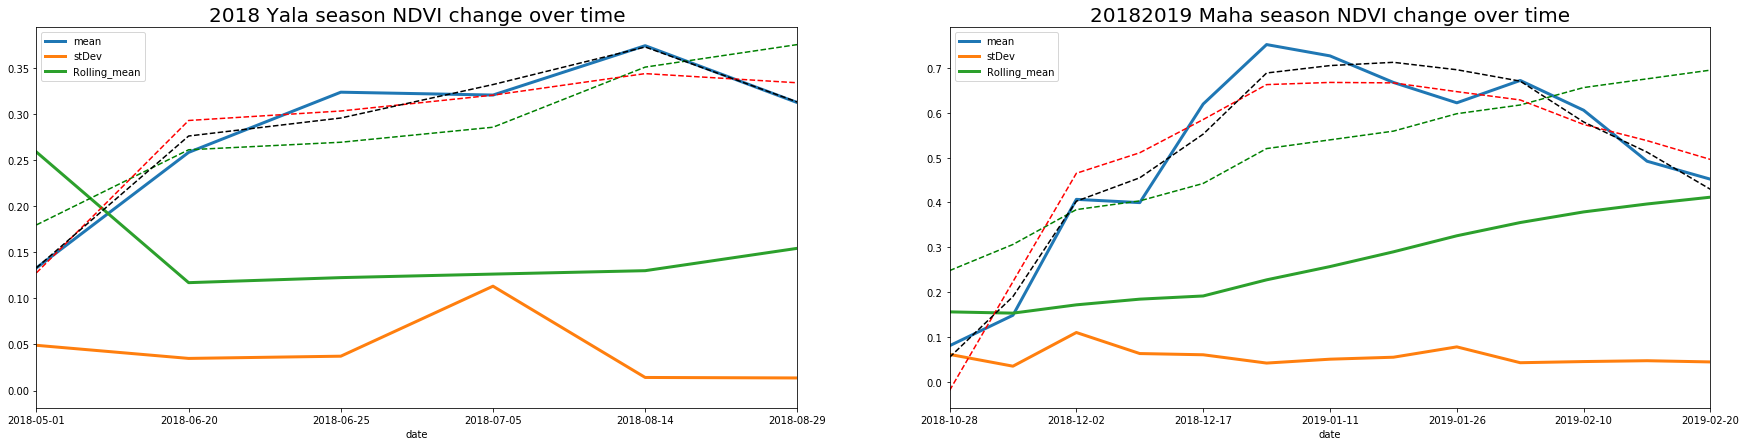

In [377]:
ndvi_yala_maha_with_out_cloud([['2018-04-25', '2018-08-30'], ['2018-10-26', '2019-02-20']],[['2018', 'Yala'],['20182019', 'Maha']])

In [374]:
get_core_info_NDVI_original('./csv/update_yield/2018_Yala_ndvi.csv')

{'avg': 0.28724439561665444, 'max': 0.374423009850258, 'cumsum': 0    0.133113
 1    0.391691
 2    0.715615
 3    1.036429
 4    1.410852
 5    1.723466
 Name: mean, dtype: float64}

In [376]:
get_core_info_NDVI_original('./csv/update_yield/2018-2019_Maha_ndvi.csv')

{'avg': 0.5111777160505453, 'max': 0.7523309679918512, 'cumsum': 0     0.079993
 1     0.228067
 2     0.634861
 3     1.034382
 4     1.653971
 5     2.406302
 6     3.133403
 7     3.801239
 8     4.423574
 9     5.095827
 10    5.701590
 11    6.193534
 12    6.645310
 Name: mean, dtype: float64}

In [378]:
get_core_info_NDVI_smooth("./csv/temp/yala_file.csv", "./csv/temp/Maha_file.csv")

{'yala': {'avg': 0.277447509765625,
  'max': 0.385986328125,
  'cumsum': 0    0.133240
  1    0.282928
  2    0.469879
  3    0.706268
  4    0.995697
  5    1.333405
  6    1.706177
  7    2.092163
  8    2.461212
  9    2.774475
  Name: mean, dtype: float64},
 'maha': {'avg': 0.462774658203125,
  'max': 0.708740234375,
  'cumsum': 0    0.054138
  1    0.221619
  2    0.522461
  3    0.960327
  4    1.522705
  5    2.180725
  6    2.889465
  7    3.587952
  8    4.198547
  9    4.627747
  Name: mean, dtype: float64}}

d:\campuz\4 yr\research-final\env\lib\site-packages\ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


liner gradient is: 0.004290885661482019
poly gradient is 2: -0.0001650817070528737 243.40470132269309
poly gradient is 3: -1.1196396896490522e-10 8.254243940435373e-05 60.852765378816706


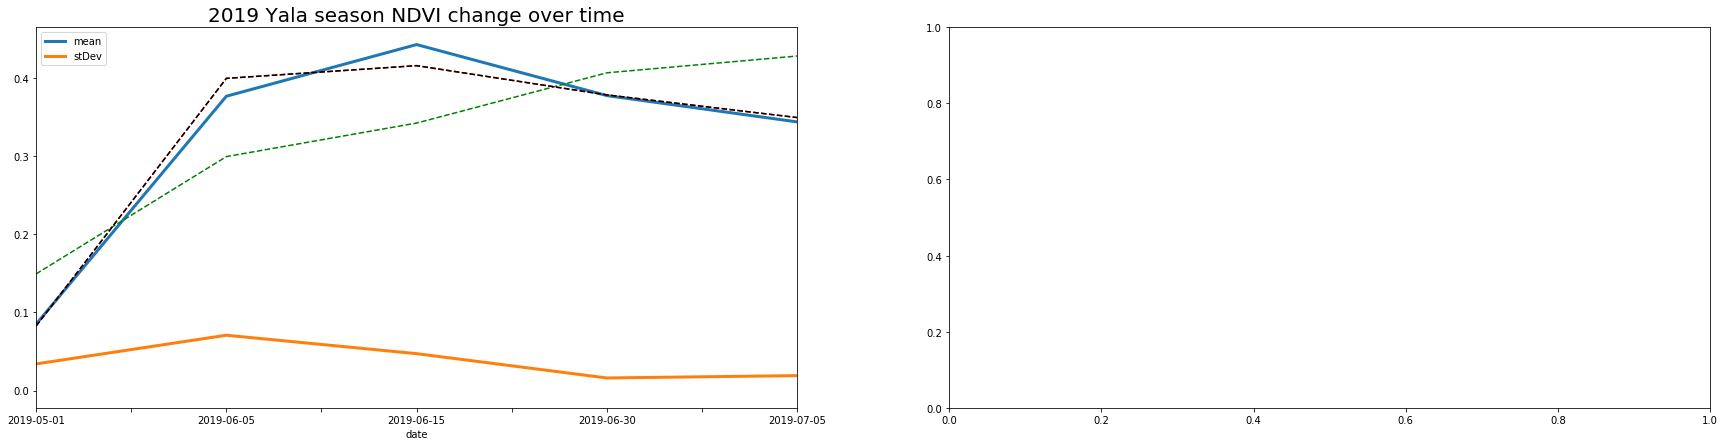

In [160]:
ndvi_yala_maha_with_out_cloud([['2019-04-25', '2019-08-30'], ['2019-10-26', '2020-02-25']],[['2019', 'Yala'],['2019-2020', 'Maha']])

### update model for yield forecasting

In here we  find the average, cumalative, maximum mean NDVIs for original and X^3 ploynomial to corelation analysis

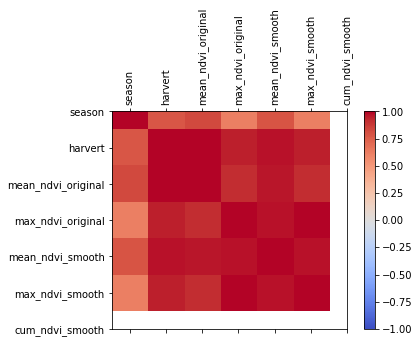

In [3]:
data = pd.read_csv('./csv/r_up.csv')

corr = data.corr(method='pearson')
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

In [4]:
corr = data.corr(method='pearson')

In [5]:
corr

,harvert,mean_ndvi_original,max_ndvi_original,mean_ndvi_smooth,max_ndvi_smooth,cum_ndvi_smooth
harvert,1.000000,0.787560,0.835862,0.621801,0.791122,0.621801
mean_ndvi_original,0.787560,1.000000,0.995684,0.951349,0.971915,0.951349
max_ndvi_original,0.835862,0.995684,1.000000,0.920828,0.962025,0.920828
mean_ndvi_smooth,0.621801,0.951349,0.920828,1.000000,0.968912,1.000000
max_ndvi_smooth,0.791122,0.971915,0.962025,0.968912,1.000000,0.968912
cum_ndvi_smooth,0.621801,0.951349,0.920828,1.000000,0.968912,1.000000


## liner regression and expontial regression for harvest vs mean_ndvi_original, max_ndvi_original, mean_ndvi_smooth, mean_ndvi_smooth, cum_ndvi_smooth

In [6]:
# from this model,we can predect the AOI harvest quantity, to get the harvest per hectare we need to (Y/15.92)*2.47105
from sklearn.linear_model import LinearRegression

### mean_ndvi_original vs harvert

In [7]:
def func_ex(x, a, b):
    return a * np.exp(-b * x)

In [8]:
def func_li(x, m, c):
    return m * x + c

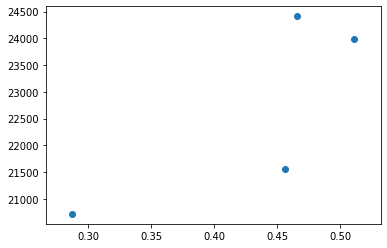

In [9]:
my_plot = plt.scatter(data[['mean_ndvi_original']], data[['harvert']])

In [10]:
linear_model_mean_ndvi_original = LinearRegression()
linear_model_mean_ndvi_original.fit(data[['mean_ndvi_original']],data[['harvert']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
print('Y = '+str(linear_model_mean_ndvi_original.coef_[0][0])+'X'+' + '+ str(linear_model_mean_ndvi_original.intercept_[0]))

Y = 14505.481966690762X + 16431.41661638405


In [12]:
# for predict to kg per hectare
m = (14505.481966690762*2.47105)/15.92
c = (16431.41661638405*2.47105)/15.92
print('Y = '+str(m)+'X'+' + '+ str(c))

Y = 2251.4931666954276X + 2550.4304038891837


In [14]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func_ex, data['mean_ndvi_original'].tolist(), data['harvert'].tolist())
popt1, pcov1 = curve_fit(func_li, data['mean_ndvi_original'].tolist(), data['harvert'].tolist())

In [15]:
popt[0], popt[1]

(17030.07732677881, -0.6614888053010266)

In [16]:
popt1[0], popt1[1]

(14505.481843044892, 16431.416675540455)

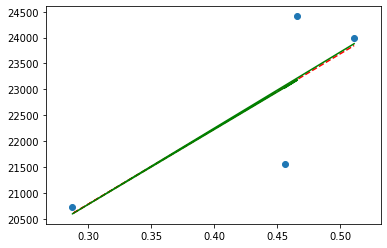

In [17]:
plt.scatter(data[['mean_ndvi_original']], data[['harvert']])
plt.plot(data['mean_ndvi_original'].tolist(), func_li(data['mean_ndvi_original'].to_numpy(), *popt1), 'r--', label="Fitted Curve linerw")
plt.plot(data['mean_ndvi_original'].tolist(), func_ex(data['mean_ndvi_original'].to_numpy(), *popt), 'g', label="Fitted Curve ex")

In [18]:
# for predict to kg per hectare
m = (14505.481966690762*2.47105)/15.92
c = (16431.41661638405*2.47105)/15.92
print('Y = '+str(m)+'X'+' + '+ str(c))

Y = 2251.4931666954276X + 2550.4304038891837


In [34]:
a = (17030.07732677881*2.47105)/15.92
b = popt[1]
print('Y = '+str(a)+' * exp('+ str(-b)+')x')

Y = 2643.352548890501 * exp(0.42110920040940203)x


### max_ndvi_original vs harvert

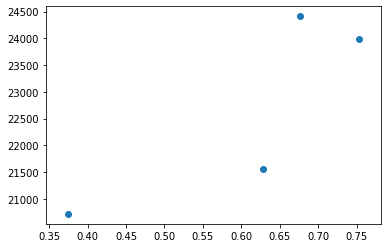

In [25]:
my_plot = plt.scatter(data[['max_ndvi_original']], data[['harvert']])

In [56]:
popt, pcov = curve_fit(func_ex, data['max_ndvi_original'].tolist(), data['harvert'].tolist())
popt1, pcov1 = curve_fit(func_li, data['max_ndvi_original'].tolist(), data['harvert'].tolist())

In [57]:
popt[0], popt[1]

(17519.621660730616, -0.42110920040940203)

In [58]:
popt1[0], popt1[0]

(9232.788720343737, 9232.788720343737)

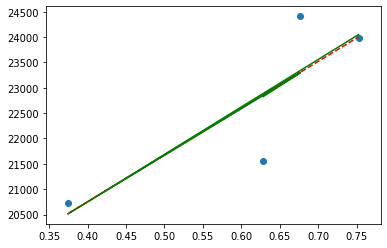

In [59]:
plt.scatter(data[['max_ndvi_original']], data[['harvert']])
plt.plot(data['max_ndvi_original'].tolist(), func_li(data['max_ndvi_original'].to_numpy(), *popt1), 'r--', label="Fitted Curve liner")
plt.plot(data['max_ndvi_original'].tolist(), func_ex(data['max_ndvi_original'].to_numpy(), *popt), 'g', label="Fitted Curve ex")

In [60]:
# for predict to kg per hectare
m = (popt1[0]*2.47105)/15.92
c = (popt1[1]*2.47105)/15.92
print('Y = '+str(m)+'X'+' + '+ str(c))

Y = 1433.0830758420473X + 2647.730452020869


In [61]:
a = (17030.07732677881*2.47105)/15.92
b = popt[1]
print('Y = '+str(a)+' * exp('+ str(-b)+')x')

Y = 2643.352548890501 * exp(0.42110920040940203)x


### mean_ndvi_smooth vs harvert

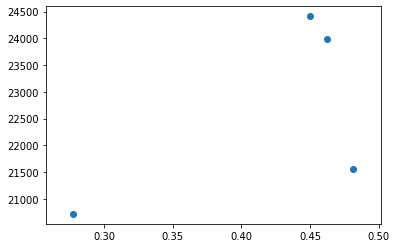

In [72]:
my_plot = plt.scatter(data[['mean_ndvi_smooth']], data[['harvert']])

In [73]:
popt, pcov = curve_fit(func_ex, data['mean_ndvi_smooth'].tolist(), data['harvert'].tolist())
popt1, pcov1 = curve_fit(func_li, data['mean_ndvi_smooth'].tolist(), data['harvert'].tolist())

In [74]:
popt[0], popt[1]

(18162.863370950323, -0.5281838685528649)

In [75]:
popt1[0], popt1[1]

(11895.190996866513, 17698.318781412083)

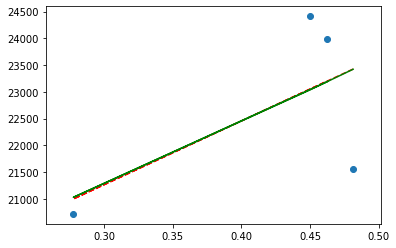

In [76]:
plt.scatter(data[['mean_ndvi_smooth']], data[['harvert']])
plt.plot(data['mean_ndvi_smooth'].tolist(), func_li(data['mean_ndvi_smooth'].to_numpy(), *popt1), 'r--', label="Fitted Curve liner")
plt.plot(data['mean_ndvi_smooth'].tolist(), func_ex(data['mean_ndvi_smooth'].to_numpy(), *popt), 'g', label="Fitted Curve ex")

In [77]:
# for predict to kg per hectare
m = (popt1[0]*2.47105)/15.92
c = (popt1[1]*2.47105)/15.92
print('Y = '+str(m)+'X'+' + '+ str(c))

Y = 1846.33239402054X + 2747.074787990473


In [78]:
a = (17030.07732677881*2.47105)/15.92
b = popt[1]
print('Y = '+str(a)+' * exp('+ str(-b)+')x')

Y = 2643.352548890501 * exp(0.5281838685528649)x


### max_ndvi_smooth vs harvert

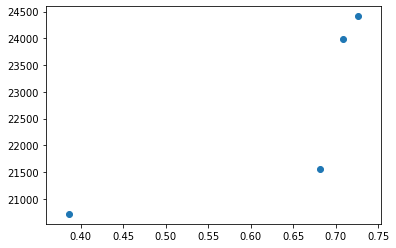

In [79]:
my_plot = plt.scatter(data[['max_ndvi_smooth']], data[['harvert']])

In [80]:
popt, pcov = curve_fit(func_ex, data['max_ndvi_smooth'].tolist(), data['harvert'].tolist())
popt1, pcov1 = curve_fit(func_li, data['max_ndvi_smooth'].tolist(), data['harvert'].tolist())

In [81]:
popt[0], popt[1]

(17509.28018518588, -0.4105041226271972)

In [82]:
popt1[0], popt1[1]

(8909.366852764304, 17098.792613449747)

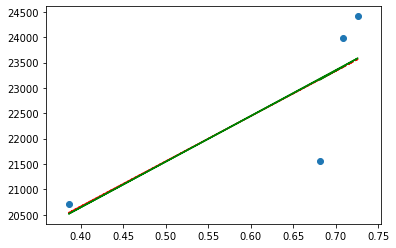

In [83]:
plt.scatter(data[['max_ndvi_smooth']], data[['harvert']])
plt.plot(data['max_ndvi_smooth'].tolist(), func_li(data['max_ndvi_smooth'].to_numpy(), *popt1), 'r--', label="Fitted Curve liner")
plt.plot(data['max_ndvi_smooth'].tolist(), func_ex(data['max_ndvi_smooth'].to_numpy(), *popt), 'g', label="Fitted Curve ex")

In [84]:
# for predict to kg per hectare
m = (popt1[0]*2.47105)/15.92
c = (popt1[1]*2.47105)/15.92
print('Y = '+str(m)+'X'+' + '+ str(c))

Y = 1382.8825980856302X + 2654.018309514133


In [85]:
a = (17030.07732677881*2.47105)/15.92
b = popt[1]
print('Y = '+str(a)+' * exp('+ str(-b)+')x')

Y = 2643.352548890501 * exp(0.4105041226271972)x


### cum_ndvi_smooth vs harvert

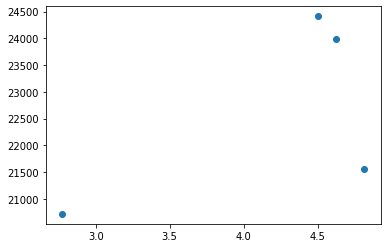

In [88]:
my_plot = plt.scatter(data[['cum_ndvi_smooth']], data[['harvert']])

In [89]:
popt, pcov = curve_fit(func_ex, data['cum_ndvi_smooth'].tolist(), data['harvert'].tolist())
popt1, pcov1 = curve_fit(func_li, data['cum_ndvi_smooth'].tolist(), data['harvert'].tolist())

In [90]:
popt[0], popt[1]

(18162.8627573667, -0.05281839496782826)

In [91]:
popt1[0], popt1[1]

(1189.5193292726885, 17698.31793175391)

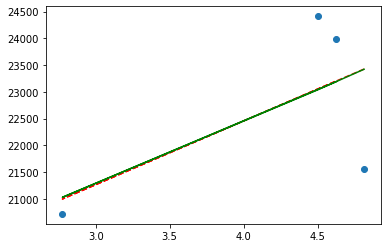

In [92]:
plt.scatter(data[['cum_ndvi_smooth']], data[['harvert']])
plt.plot(data['cum_ndvi_smooth'].tolist(), func_li(data['cum_ndvi_smooth'].to_numpy(), *popt1), 'r--', label="Fitted Curve liner")
plt.plot(data['cum_ndvi_smooth'].tolist(), func_ex(data['cum_ndvi_smooth'].to_numpy(), *popt), 'g', label="Fitted Curve ex")

In [94]:
# for predict to kg per hectare
m = (popt1[0]*2.47105)/15.92
c = (popt1[1]*2.47105)/15.92
print('Y = '+str(m)+'X'+' + '+ str(c))

Y = 184.63327503764302X + 2747.074656109328


In [95]:
a = (17030.07732677881*2.47105)/15.92
b = popt[1]
print('Y = '+str(a)+' * exp('+ str(-b)+')x')

Y = 2643.352548890501 * exp(0.05281839496782826)x


### final result
| forecaster             | model                    | Pearson's r |
|------------------------|--------------------------|-------------|
| NDVI mean              | Y = 2251.50X + 2550.43   | 0.787560    |
|                        | Y = 2643.35 * exp(0.42X) |             |
| NDVI max               | Y = 1433.08X + 2647.73   | 0.835862    |
|                        | Y = 2643.35 * exp(0.42X) |             |
| NDVI mean smooth       | Y = 1846.33X + 2747.07   | 0.835862    |
|                        | Y = 2643.35 * exp(0.53X) |             |
| NDVI max smooth        | Y = 1382.88X + 2654.02   | 0.835862    |
|                        | Y = 2643.35 * exp(0.41X) |             |
| NDVI Cumulative smooth | Y = 184.63X + 2747.07    | 0.835862    |
|                        | Y = 2643.35 * exp(0.05)x |             |

In [70]:
# integer to date convert fn
from datetime import datetime, timedelta

def xldate_to_datetime(xldate):
   tempDate = datetime(1, 1, 2)
   deltaDays =timedelta(days=int(xldate)-2)
   TheTime = (tempDate + deltaDays )
   return TheTime.strftime("%Y-%m-%d")

In [256]:
xldate_to_datetime(737180)

'2019-05-01'

### 

### corelation analysis with gradient of the NDVI over time vs past yield data of paddy(out of date)

althought there are 8 paddy seasonal, the gredient can be obtain 5 paddy seasonal because of the cloud affects

In [124]:
paddy_df = pd.read_csv('./csv/linear_paddy_data.csv')
paddy_df.head(5)

# here X represent the NDVI gredient value of paddy seasonal
# Y represent the harvest yield metric ton per acre

,X,Y
0,0.005184,1.36
1,0.004381,1.36
2,0.001632,1.32
3,0.003892,1.34


In [102]:
# find the outliers using Using Z score
outliers=[]
def detect_outlier(data):
    
    threshold=3
    mean_1 = np.mean(data)
    std_1 =np.std(data)
    
    
    for y in data:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [103]:
X_data = [x for x in paddy_df['X'][0:4]]
detect_outlier(X_data)

[]

In [125]:
paddy_df.corr()

,X,Y
X,1.000000,0.951097
Y,0.951097,1.000000


In [126]:
# paddy yield model
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(paddy_df[['X']],paddy_df[['Y']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [138]:
linear_model.coef_

array([[11.95704437]])

In [139]:
linear_model.intercept_

array([1.29989691])

In [140]:
paddy_df1 = pd.read_csv('./csv/ploy2_paddy_data.csv')
paddy_df1.head(5)

,X,Y
0,-0.000127,1.36
1,-7.684016,1.36
2,-2.268983,1.32
3,-0.000117,1.34


In [109]:
X_data = [x for x in paddy_df1['X']]
detect_outlier(X_data)

[]

In [141]:
paddy_df1.corr()

,X,Y
X,1.000000,-0.281089
Y,-0.281089,1.000000


In [142]:

poly2_model = LinearRegression()
poly2_model .fit(paddy_df1[['X']],paddy_df1[['Y']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [143]:
poly2_model.coef_

array([[-0.00148474]])

In [144]:
poly2_model.intercept_

array([1.3413055])

In [114]:
paddy_df2 = pd.read_csv('./csv/ploy1_paddy_data.csv')
paddy_df2.head(5)

,X,Y
0,186.340258,1.36
1,113.219190,1.36
2,33.440861,1.32
3,172.642884,1.34


In [115]:
X_data = [x for x in paddy_df2['X']]
detect_outlier(X_data)

[]

In [116]:
paddy_df2.corr()

,X,Y
X,1.000000,0.698517
Y,0.698517,1.000000


In [149]:
ploy1_model = LinearRegression()
ploy1_model.fit(paddy_df2[['X']],paddy_df2[['Y']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [150]:
ploy1_model.coef_

array([[0.00019209]])

In [151]:
ploy1_model.intercept_

array([1.32071825])

### accuracy assesment

liner gradient is: 0.002989866695678894
poly gradient is: 5.572777568719754e-06 -8.209556984430844
liner gradient is: 0.010277996583965715
poly gradient is: 1.9458466159866654e-05 -28.672640384834242


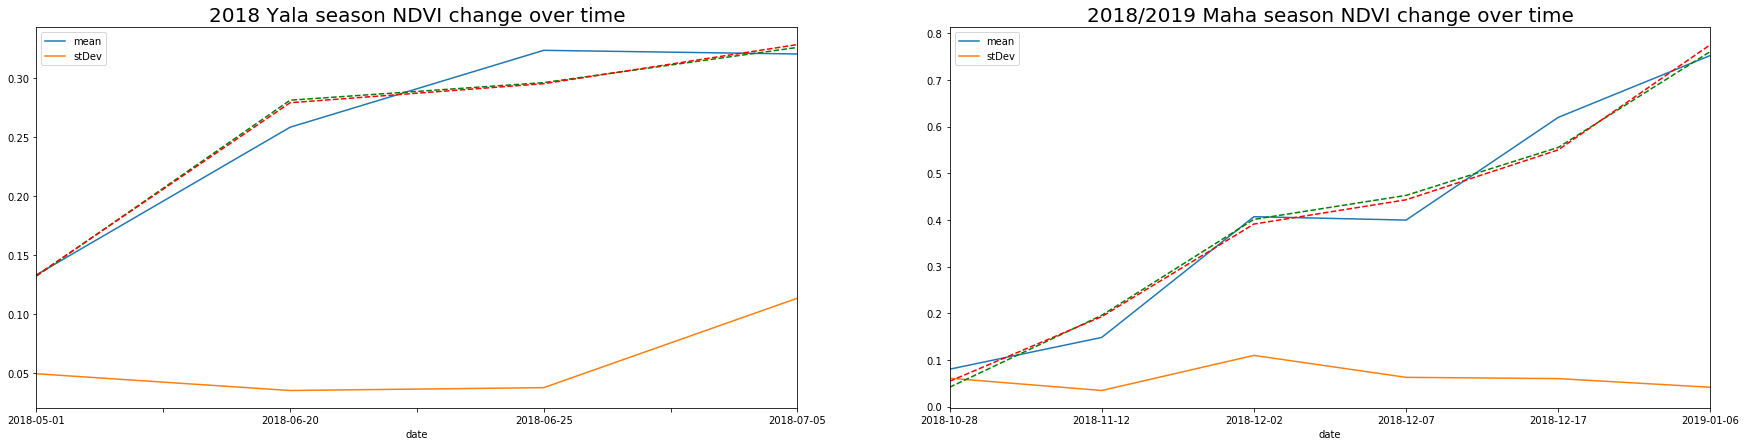

In [123]:
ndvi_yala_maha_with_out_cloud([['2018-04-25', '2018-07-06'], ['2018-10-26', '2019-01-10']],[['2018', 'Yala'],['2018/2019', 'Maha']])

### linear model

In [133]:
print("2018 Yala season 3rd phase(1) "+ str(linear_model.predict([[0.002989866695678894]]))+ " pre acre")

2018 Yala season 3rd phase(1) [[1.33564688]] pre acre


In [147]:
print("2018-2019 Maha season 3rd phase(1) "+ str(linear_model.predict([[0.010277996583965715]]))+ " pre acre")

2018-2019 Maha season 3rd phase(1) [[1.42279137]] pre acre


### ployline mode with order 2

In [146]:
print("2018 Yala season 3rd phase(1) "+ str(poly2_model.predict([[5.572777568719754]]))+ " pre acre")

2018 Yala season 3rd phase(1) [[1.33303135]] pre acre


In [148]:
print("2018-2019 Maha season 3rd phase(1) "+ str(poly2_model.predict([[1.9458466159866654]]))+ " pre acre")

2018-2019 Maha season 3rd phase(1) [[1.33841641]] pre acre


### ployline mode with order 1

In [153]:
print("2018 Yala season 3rd phase(1) "+ str(ploy1_model.predict([[-8.209556984430844]]))+ " pre acre")

2018 Yala season 3rd phase(1) [[1.3191413]] pre acre


In [154]:
print("2018-2019 Maha season 3rd phase(1) "+ str(ploy1_model.predict([[-28.672640384834242]]))+ " pre acre")

2018-2019 Maha season 3rd phase(1) [[1.31521063]] pre acre


liner gradient is: 0.002989866695678894
poly gradient is: 5.572777568719754e-06 -8.209556984430844
liner gradient is: 0.008693122287653895
poly gradient is: -4.444932511925169e-05 65.53026977538318


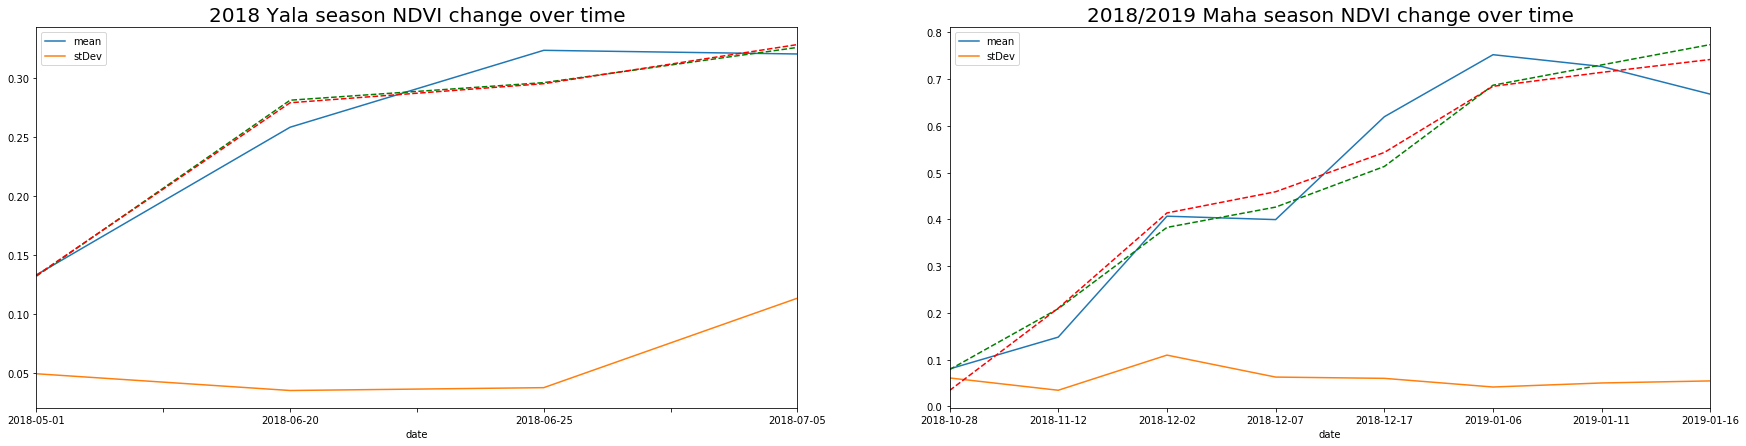

In [155]:
ndvi_yala_maha_with_out_cloud([['2018-04-25', '2018-07-16'], ['2018-10-26', '2019-01-20']],[['2018', 'Yala'],['2018/2019', 'Maha']])

### linear model

In [165]:
print("2018-2019 Maha season 3rd phase(2) "+ str(linear_model.predict([[0.008693122287653895]]))+ " pre acre")

2018-2019 Maha season 3rd phase(2) [[1.40384096]] pre acre


### ployline mode with order 2

In [166]:
print("2018-2019 Maha season 3rd phase(2) "+ str(poly2_model.predict([[-4.444932511925169]]))+ " pre acre")

2018-2019 Maha season 3rd phase(2) [[1.34790508]] pre acre


### ployline mode with order 1

In [167]:
print("2018-2019 Maha season 3rd phase(2) "+ str(ploy1_model.predict([[65.53026977538318]]))+ " pre acre")

2018-2019 Maha season 3rd phase(2) [[1.3333057]] pre acre


liner gradient is: 0.002989866695678894
poly gradient is: 5.572777568719754e-06 -8.209556984430844
liner gradient is: 0.0074503514384336505
poly gradient is: -8.193244680155042e-05 120.78258181235718


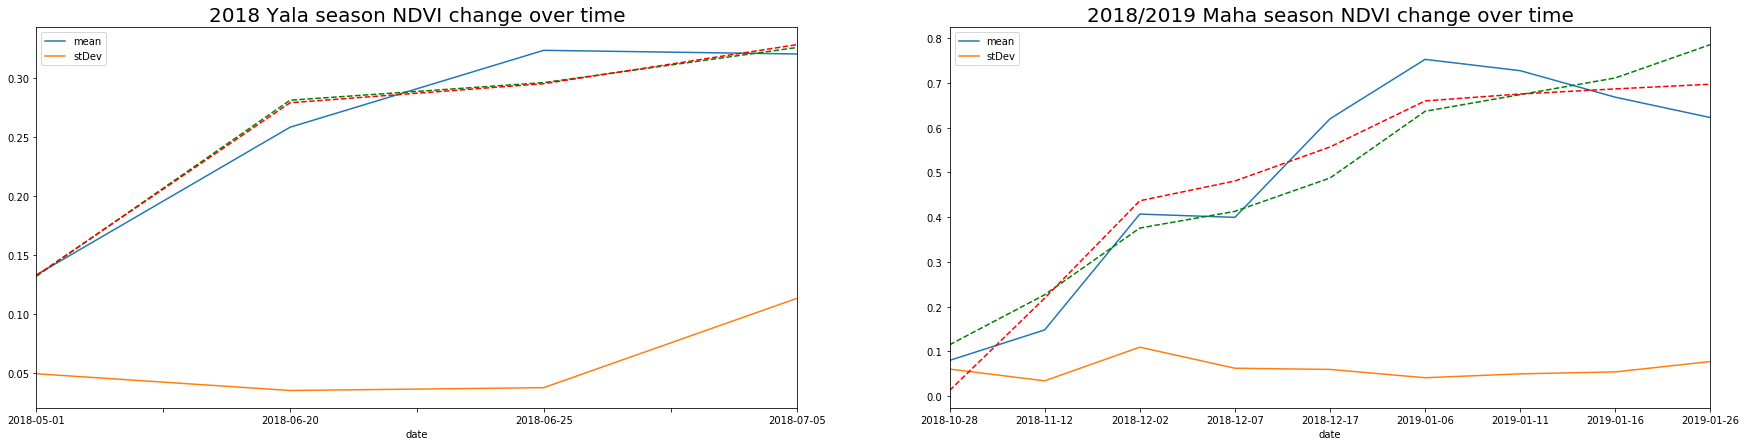

In [162]:
ndvi_yala_maha_with_out_cloud([['2018-04-25', '2018-07-26'], ['2018-10-26', '2019-01-30']],[['2018', 'Yala'],['2018/2019', 'Maha']])

### linear model

In [171]:
print("2018-2019 Maha season 3rd phase(3) "+ str(linear_model.predict([[0.0074503514384336505]]))+ " pre acre")

2018-2019 Maha season 3rd phase(3) [[1.38898109]] pre acre


### ployline mode with order 2

In [172]:
print("2018-2019 Maha season 3rd phase(2) "+ str(poly2_model.predict([[-8.193244680155042]]))+ " pre acre")

2018-2019 Maha season 3rd phase(2) [[1.35347037]] pre acre


### ployline mode with order 1

In [175]:
print("2018-2019 Maha season 3rd phase(2) "+ str(ploy1_model.predict([[120.78258181235718]]))+ " pre acre")

2018-2019 Maha season 3rd phase(2) [[1.3439189]] pre acre


liner gradient is: 0.002989866695678894
poly gradient is: 5.572777568719754e-06 -8.209556984430844
liner gradient is: 0.005852098067393626
poly gradient is: -9.542165580304885e-05 140.66661226986267


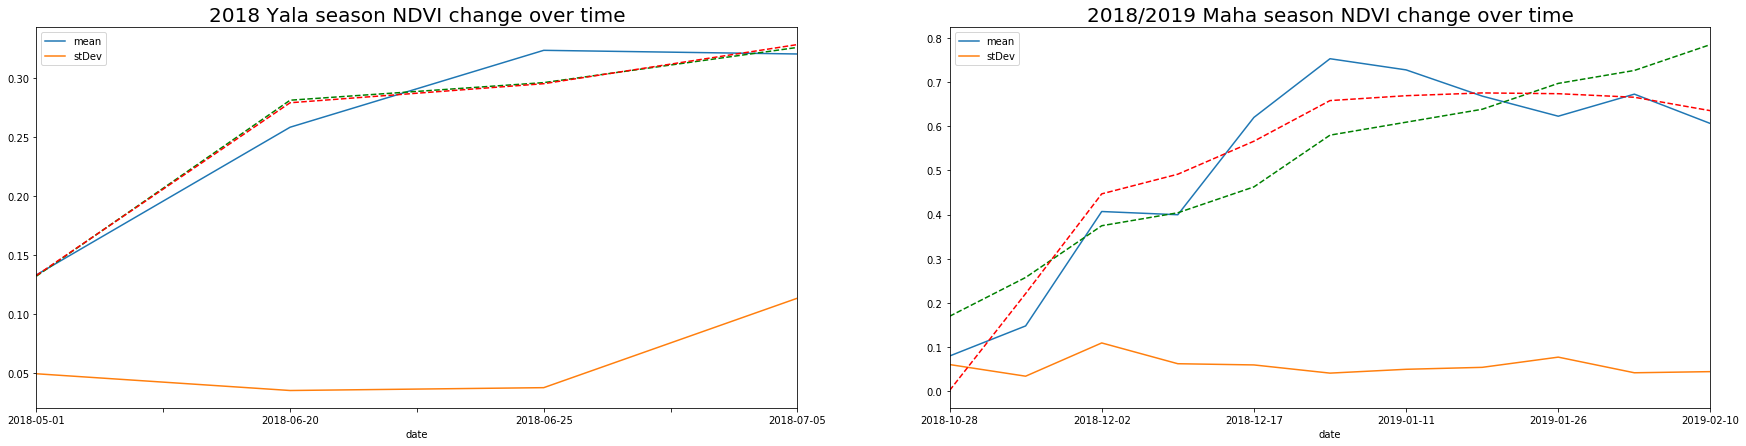

In [170]:
ndvi_yala_maha_with_out_cloud([['2018-04-25', '2018-08-10'], ['2018-10-26', '2019-02-10']],[['2018', 'Yala'],['2018/2019', 'Maha']])

### linear model

In [176]:
print("2018-2019 Maha season 3rd phase(3) "+ str(linear_model.predict([[0.005852098067393626]]))+ " pre acre")

2018-2019 Maha season 3rd phase(3) [[1.36987071]] pre acre


### ployline mode with order 2

In [177]:
print("2018-2019 Maha season 3rd phase(2) "+ str(poly2_model.predict([[-9.542165580304885]]))+ " pre acre")

2018-2019 Maha season 3rd phase(2) [[1.35547317]] pre acre


### ployline mode with order 1

In [178]:
print("2018-2019 Maha season 3rd phase(2) "+ str(ploy1_model.predict([[140.66661226986267]]))+ " pre acre")

2018-2019 Maha season 3rd phase(2) [[1.34773834]] pre acre
